# Introduction

This project looks at self-reported cyber-victimization data. Participants completed four psychometrics tests looking at depression, anxiety, alcohol uses and Cyber-Victimization. There were 243 participants (102 Males & 141 Females, 145 students & 98 non-student participants) that completed this research. This project has two purposes, the first is to clean the dataset (remove unnecessary columns, rename the columns and recode the data into the correct format). Secondly, to test the two research question. Firstly, *Is there a significant relationship between cyberbullying & depression, anxiety, and alcohol use?*. The second question is *Do victims of cyberbullying score higher for depression, anxiety and alcohol use compared to non-victims?*

The tools used to collect the data were:

Patient Health Questionnaire 9-item [PHQ-9] (https://www.integration.samhsa.gov/images/res/PHQ%20-%20Questions.pdf)

Generalized Anxiety Disorder 7-item [GAD-7] (https://www.integration.samhsa.gov/clinical-practice/GAD708.19.08Cartwright.pdf)

Alcohol Use Disorders Identification Test [AUDIT] (https://pubs.niaaa.nih.gov/publications/Audit.pdf)

Cyber-Victimization Questionnaire [CVS] (https://www.researchgate.net/publication/263920031_Cyber-_and_Traditional_Peer_Victimization_Unique_Relationships_With_Adolescent_Well-Being)

In [1]:
set.seed(1234)

library(car)
library(dplyr)
library(MASS)
library(ggplot2)


Attaching package: ‘dplyr’

The following object is masked from ‘package:car’:

    recode

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘MASS’

The following object is masked from ‘package:dplyr’:

    select



In [2]:
cb <- read.csv("/home/james/Downloads/Cyberbullying.csv", na.strings=c("","NA"))
names(cb)

[1] "StartDate"             "EndDate"               "Status"               
 [4] "IPAddress"             "Progress"              "Duration..in.seconds."
 [7] "Finished"              "RecordedDate"          "ResponseId"           
[10] "RecipientLastName"     "RecipientFirstName"    "RecipientEmail"       
[13] "ExternalReference"     "LocationLatitude"      "LocationLongitude"    
[16] "DistributionChannel"   "UserLanguage"          "Q3"                   
[19] "Q5_1"                  "Q5_2"                  "Q5_3"                 
[22] "Q5_4"                  "Q5_5"                  "Q18"                  
[25] "Q20"                   "Q22"                   "Q48"                  
[28] "Q45_1"                 "Q45_2"                 "Q45_3"                
[31] "Q45_4"                 "Q45_5"                 "Q45_6"                
[34] "Q36_1"                 "Q36_2"                 "Q36_3"                
[37] "Q36_4"                 "Q36_5"                 "Q36_6"                
[40] "Q36_7"                 "Q27_1"                 "Q27_2"                
[43] "Q27_3"                 "Q27_4"                 "Q27_5"                
[46] "Q27_6"                 "Q27_7"                 "Q27_8"                
[49] "Q27_9"                 "Q30"                   "Q32"                  
[52] "Q34"                   "Q36"                   "Q38"                  
[55] "Q40"                   "Q42"                   "Q44"                  
[58] "Q46"                   "Q48.1"                 "Q3...Topics"

The first 23 columns are removed and the last column is also removed from the dataset. Secondly, the missing data needs to be removed from the dataset and finally, the remaining columns need to be renamed to make them easier to understand.

In [3]:
cb <- cb[-c(1:2), 24:59]
cb <- na.omit(cb)

names(cb) <- c("Sex", "Age", "student", "working", 
               "CB1", "CB2", "CB3", "CB4", "CB5", "CB6", 
               "GAD1", "GAD2", "GAD3", "GAD4", "GAD5", "GAD6", "GAD7", 
               "PHQ1", "PHQ2", "PHQ3", "PHQ4", "PHQ5", "PHQ6", "PHQ7", "PHQ8", "PHQ9", 
               "A1", "A2", "A3", "A4", "A5", "A6", "A7", "A8", "A9", "A10")

names(cb)

[1] "Sex"     "Age"     "student" "working" "CB1"     "CB2"     "CB3"    
 [8] "CB4"     "CB5"     "CB6"     "GAD1"    "GAD2"    "GAD3"    "GAD4"   
[15] "GAD5"    "GAD6"    "GAD7"    "PHQ1"    "PHQ2"    "PHQ3"    "PHQ4"   
[22] "PHQ5"    "PHQ6"    "PHQ7"    "PHQ8"    "PHQ9"    "A1"      "A2"     
[29] "A3"      "A4"      "A5"      "A6"      "A7"      "A8"      "A9"     
[36] "A10"

In [4]:
df <- cb[, c("Sex", "Age", "student", "working")]
df2 <- cb[, c("A9", "A10")]

delete <- c('Sex', 'Age', 'student', 'working', 'A9', 'A10')
cb <- cb[, !(names(cb) %in% delete)]

df$Sex <- recode_factor(df$Sex, `1` = "M", `2` = "F")
df$student <- recode_factor(df$student, `1` = "Y", `2` = "N")
df$working <- recode_factor(df$working, `1` = "Y", `2` = "N")

df2$A9 <- car::recode(df2$A9,"1=0; 2=2; 3=4")
df2$A10 <- car::recode(df2$A10,"1=0; 2=2; 3=4")

The columns need to recoded back to zero, as qualtrics codes the data starting from one.

In [5]:
a <- function(x){
    y <- x - 2
    return(y)
}

cb <- lapply(cb, as.numeric)
cb <- data.frame(cb)
cb <- a(cb)

In [6]:
cb <- cbind(cb, df2)
cb <- cbind(df, cb)

In [7]:
cb$A9 <- as.numeric(cb$A9)
cb$A10 <- as.numeric(cb$A10)

Now the data has been recoded, the totals for each of the four variables can be summed.

In [8]:
cb["cbtotal"] <- cb$CB1 + cb$CB2 + cb$CB3 + cb$CB4 + cb$CB5 + cb$CB6
cb["Gad"] <- cb$GAD1 + cb$GAD2 + cb$GAD3 + cb$GAD4 + cb$GAD5 + cb$GAD6 + cb$GAD7
cb["PHQ"] <- cb$PHQ1 + cb$PHQ2 + cb$PHQ3 + cb$PHQ4 + cb$PHQ5 + cb$PHQ6 + cb$PHQ7 + cb$PHQ8 + cb$PHQ9
cb["Audit"] <- cb$A1 + cb$A2 + cb$A3 + cb$A4 + cb$A5 + cb$A6 + cb$A7 + cb$A8 + cb$A9 + cb$A10

A dummy variable is created to divided the victims and non-victims up into their groups.

In [9]:
cb["cv"] <- ifelse(cb$cbtotal > 0, 1, 0)
names(cb)

[1] "Sex"     "Age"     "student" "working" "CB1"     "CB2"     "CB3"    
 [8] "CB4"     "CB5"     "CB6"     "GAD1"    "GAD2"    "GAD3"    "GAD4"   
[15] "GAD5"    "GAD6"    "GAD7"    "PHQ1"    "PHQ2"    "PHQ3"    "PHQ4"   
[22] "PHQ5"    "PHQ6"    "PHQ7"    "PHQ8"    "PHQ9"    "A1"      "A2"     
[29] "A3"      "A4"      "A5"      "A6"      "A7"      "A8"      "A9"     
[36] "A10"     "cbtotal" "Gad"     "PHQ"     "Audit"   "cv"

Finally, the students and non-students are divided up based on how they answered; Are you a student?

In [10]:
stu <- subset(cb, student == "Y")
non <- subset(cb, student == "N")

victim_stu <- subset(stu, cv == 1)
victim_non <- subset(non, cv == 1)


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine



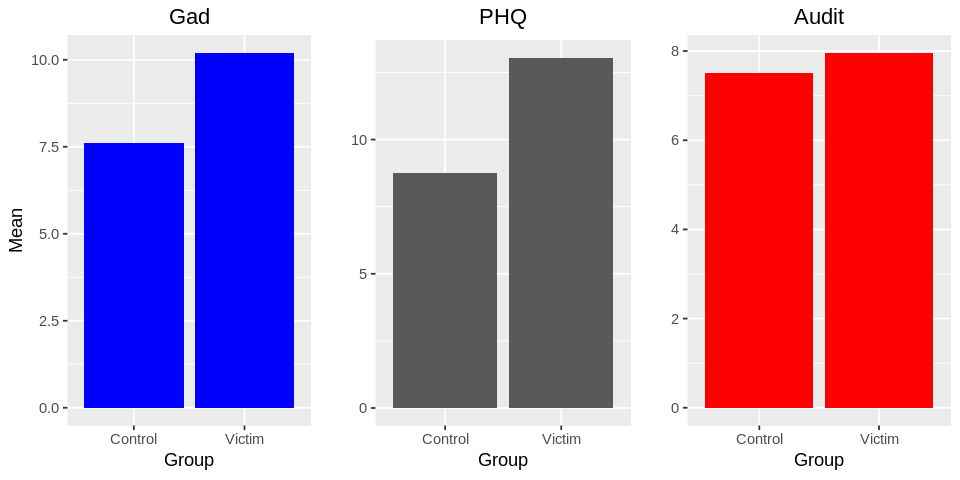

In [11]:
library("gridExtra")

options(repr.plot.width=8, repr.plot.height=4)

plot1 <- ggplot(stu, aes(x = factor(cv), y = Gad)) + 
stat_summary(fun.y="mean", geom="bar", fill = "blue") + 
labs(x = "Group", y = "Mean") + 
ggtitle("Gad") + 
theme(plot.title = element_text(hjust = 0.5)) +
scale_x_discrete(labels=c("Control", "Victim"))

plot2 <- ggplot(stu, aes(x = factor(cv), y = PHQ)) + 
stat_summary(fun.y="mean", geom="bar") + 
labs(x = "Group", y = "") +
ggtitle("PHQ") + 
theme(plot.title = element_text(hjust = 0.5)) +
scale_x_discrete(labels=c("Control", "Victim"))

plot3 <- ggplot(stu, aes(x = factor(cv), y = Audit)) + 
stat_summary(fun.y="mean", geom="bar", fill = "red")+ 
labs(x = "Group", y = "") +
ggtitle("Audit") + 
theme(plot.title = element_text(hjust = 0.5)) +
scale_x_discrete(labels=c("Control", "Victim"))

grid.arrange(plot1, plot2, plot3, nrow=1, ncol=3)

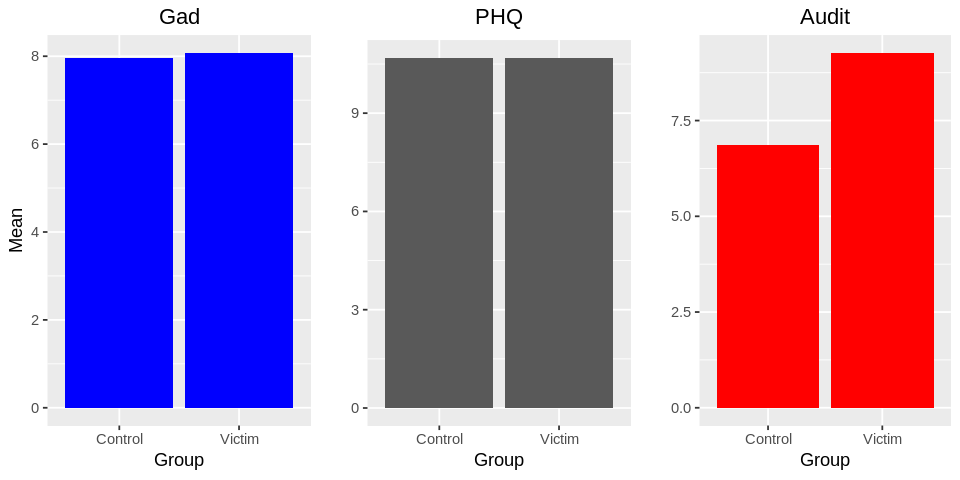

In [12]:
plot1 <- ggplot(non, aes(x = factor(cv), y = Gad)) + 
stat_summary(fun.y="mean", geom="bar", fill = "blue") + 
labs(x = "Group", y = "Mean") + 
ggtitle("Gad") + 
theme(plot.title = element_text(hjust = 0.5)) +
scale_x_discrete(labels=c("Control", "Victim"))

plot2 <- ggplot(non, aes(x = factor(cv), y = PHQ)) + 
stat_summary(fun.y="mean", geom="bar") + 
labs(x = "Group", y = "") +
ggtitle("PHQ") + 
theme(plot.title = element_text(hjust = 0.5)) +
scale_x_discrete(labels=c("Control", "Victim"))

plot3 <- ggplot(non, aes(x = factor(cv), y = Audit)) + 
stat_summary(fun.y="mean", geom="bar", fill = "red")+ 
labs(x = "Group", y = "") +
ggtitle("Audit") + 
theme(plot.title = element_text(hjust = 0.5)) +
scale_x_discrete(labels=c("Control", "Victim"))

grid.arrange(plot1, plot2, plot3, nrow=1, ncol=3)

In [13]:
corstars <- function(x, type="spearman"){ 
require(Hmisc) 
x <- as.matrix(x) 
R <- rcorr(x, type="spearman")$r 
p <- rcorr(x, type="spearman")$P 

## define notions for significance levels; spacing is important.
mystars <- ifelse(p < .001, "***", ifelse(p < .01, "** ", ifelse(p < .05, "* ", " ")))

## trunctuate the matrix that holds the correlations to two decimal
R <- format(round(cbind(rep(-1.11, ncol(x)), R), 2))[,-1] 

## build a new matrix that includes the correlations with their apropriate stars 
Rnew <- matrix(paste(R, mystars, sep=""), ncol=ncol(x)) 
diag(Rnew) <- paste(diag(R), " ", sep="") 
rownames(Rnew) <- colnames(x) 
colnames(Rnew) <- paste(colnames(x), "", sep="") 

## remove upper triangle
Rnew <- as.matrix(Rnew)
Rnew[upper.tri(Rnew, diag = TRUE)] <- ""
Rnew <- as.data.frame(Rnew) 

## remove last column and return the matrix (which is now a data frame)
Rnew <- cbind(Rnew[1:length(Rnew)-1])
return(Rnew) 
}

In [14]:
totals1 <- victim_stu[, c("cbtotal", "Gad", "PHQ", "Audit")]
corstars(totals1)

totals2 <- victim_non[, c("cbtotal", "Gad", "PHQ", "Audit")]
corstars(totals2)

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:dplyr’:

    combine, src, summarize

The following objects are masked from ‘package:base’:

    format.pval, round.POSIXt, trunc.POSIXt, units



,cbtotal,Gad,PHQ
cbtotal,,,
Gad,0.17,,
PHQ,0.23*,0.76***,
Audit,0.06,-0.04,0.03


,cbtotal,Gad,PHQ
cbtotal,,,
Gad,0.36**,,
PHQ,0.48***,0.84***,
Audit,-0.08,0.15,0.05


The correlations are used to look at the relationship between each of the variables between the two different population. The top table looks at the student population and the bottom table looks at the non-student population. The results show that there is a significant relationship between cyber victimisation scores and depression scores (PHQ) (*r*<sub>s</sub> = .23, p < .05) scores for students, although there is no significant relationship for anxiety (Gad) for students. The second correlation looked at the non-student population. There was a significant relationship for depression (PHQ) (*r*<sub>s</sub> = .48, p < .001), a more significant correlation compared to the student sample. Also, anxiety (Gad) was also significant (*r*<sub>s</sub> = .36, p < .01), suggesting that cyberbullying may have a more significant effect on non-students compared to students. It was also found that alcohol use (Audit) was non-significant for both samples suggesting that there is no significant relationship between cyberbullying and alcohol use.

The next part of this project is to compare the victims scores with the control groups.

In [15]:
mod <- manova(cbind(Gad, PHQ, Audit) ~ cv, data = stu)
summary(mod)
summary.aov(mod)

           Df  Pillai approx F num Df den Df   Pr(>F)   
cv          1 0.08302   4.2552      3    141 0.006533 **
Residuals 143                                           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response Gad :
             Df Sum Sq Mean Sq F value  Pr(>F)  
cv            1  244.8 244.759  6.7663 0.01027 *
Residuals   143 5172.8  36.173                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response PHQ :
             Df Sum Sq Mean Sq F value    Pr(>F)    
cv            1  663.8  663.84   12.63 0.0005148 ***
Residuals   143 7516.1   52.56                      
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

 Response Audit :
             Df Sum Sq Mean Sq F value Pr(>F)
cv            1    7.2  7.1929  0.2671 0.6061
Residuals   143 3850.4 26.9256               


A one-way manova was conducted to examine the differences between the victims (n=75) and the control group (n=70) for GAD-7, PHQ-9, and AUDIT for the students. A dummy variable was used, victims coded as 1 and the control coded as 0. The cyberbullying dummy variable was used as the independent variable and scores on GAD-7, PHQ-9, and AUDIT was used as the dependent variable. This is based on a similar methodology used by Schenk and Fremouw (2012). The model was significant *F*(3, 143) = 4.25, *p*<.001. The results show that GAD-7 scores were significantly different between the victims and the control group *F*(1, 143) = 6.76, *p*=.01, suggesting that victims of cyberbullying have significantly higher levels of anxiety compared to the control group. The scores for PHQ-9 were also significantly different *F*(1, 143) = 12.63, *p*<.001 between the victims and the control group, suggesting that participants that were the victim of cyberbullying had significantly higher levels of depression compared to the control group. However, the results show that the scores for AUDIT are non-significant, suggesting that there is no significant difference.

In [16]:
mod1 <- manova(cbind(Gad, PHQ, Audit) ~ cv, data = non)
summary(mod1)
summary.aov(mod1)

          Df   Pillai approx F num Df den Df Pr(>F)
cv         1 0.044741   1.4675      3     94 0.2284
Residuals 96                                       

 Response Gad :
            Df  Sum Sq Mean Sq F value Pr(>F)
cv           1    0.35   0.354  0.0108 0.9173
Residuals   96 3137.61  32.683               

 Response PHQ :
            Df Sum Sq Mean Sq F value Pr(>F)
cv           1    0.0   0.012   2e-04 0.9877
Residuals   96 5007.2  52.158               

 Response Audit :
            Df  Sum Sq Mean Sq F value  Pr(>F)  
cv           1  140.55 140.552  4.3505 0.03965 *
Residuals   96 3101.45  32.307                  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


A second one-way manova was conducted to examine the differences between the victims (n=52) and the control group (n=46) for GAD-7, PHQ-9, and AUDIT for the non-student participants. Again a dummy variable was used, victims coded as 1 and the control coded as 0. The cyberbullying dummy variable was used as the independent variable and scores on GAD-7, PHQ-9, and AUDIT was used as the dependent variable. The model was non-significant (p=.22). However, the results show that the scores for AUDIT were significant *F*(1, 96) = 4.35, *p*=.03), suggesting that victims of cyberbullying consume a higher amount of alcohol compared to non-victims of cyberbullying.

### Conclusion

In conclusion, the data does suggest that victims of cyberbullying experience higher levels of depression and anxiety compared to individuals that have never experienced cyberbullying. The data would also suggest that students and participants that worked experienced the negative effects of cyberbullying differently, where students experience higher levels of depression and anxiety, participants in the workplace have higher levels of alcohol consumers as a result. Although, there is a significant drinking culture at university and this may negate the effect that cyberbullying may have. Whereas stress, depression, and anxiety are now significant factors in the workplace and this may negate the effect of cyberbullying in this environment.

Although there are several limitations to this study, specific questions about the perpetrator were not taken into account. As well as whether the victim was also the victim of traditional face-to-face bullying was not taken into account.

Reference

Allison M. Schenk & William J. Fremouw (2012) Prevalence, Psychological Impact, and Coping of Cyberbully Victims           Among College Students, Journal of School Violence, 11:1, 21-37, DOI: 10.1080/15388220.2011.630310